In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# Load the CSV data
data = pd.read_csv(r'C:\Users\Shakil\Downloads\Mall_Customers.csv')

In [5]:
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Extract relevant features for clustering (Annual Income and Spending Score)
X = data.iloc[:, [3, 4]].values# Initialize variables to store SSE values
sse = []

In [9]:
# Perform K-means clustering for K values from 1 to 15
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

C:\Users\Shakil\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shakil\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shakil\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shakil\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans 

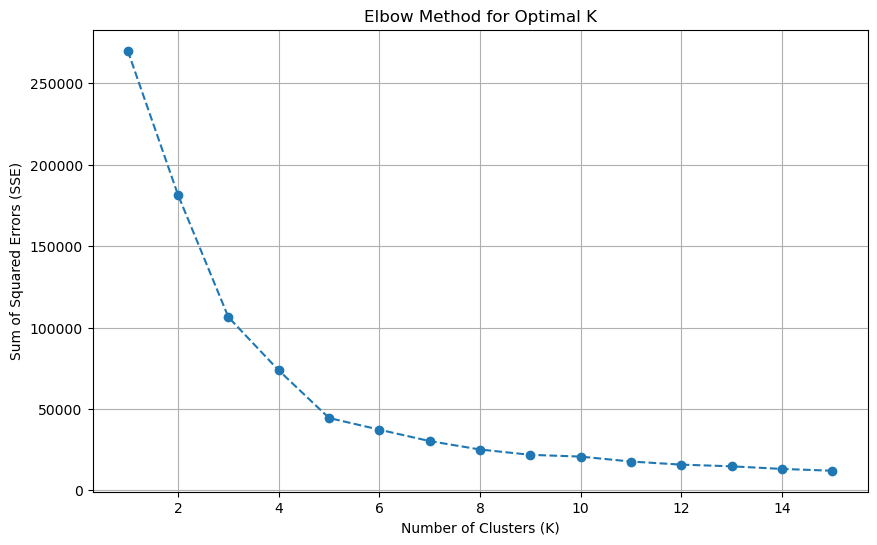

In [10]:
# Plot SSE values for different K values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid()
plt.show()

## Part B

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [14]:
# Load the CSV data
data = pd.read_csv(r'C:\Users\Shakil\Downloads\Mall_Customers.csv')

# Extract relevant features for clustering (e.g., Annual Income and Spending Score)
X = data.iloc[:, [3, 4]].values

# Standardize the features (if necessary)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
# Perform hierarchical clustering using Ward's linkage method
linked = linkage(X, method='ward', metric='euclidean')

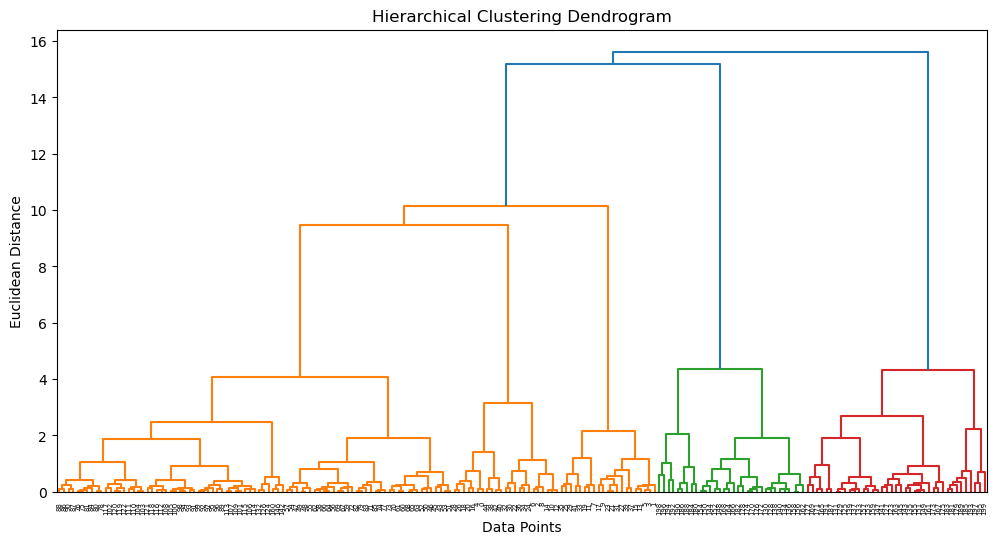

In [16]:
# Plot the dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


## Part C

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [18]:
# Load the CSV data
data = pd.read_csv(r'C:\Users\Shakil\Downloads\Mall_Customers.csv')

# Extract relevant features for clustering (e.g., Annual Income and Spending Score)
X = data.iloc[:, [3, 4]].values

# Standardize the features (if necessary)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
# Create a DBSCAN clustering model
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)


DBSCAN(eps=0.3)

In [20]:
# Get the labels assigned to each data point
labels = dbscan.labels_

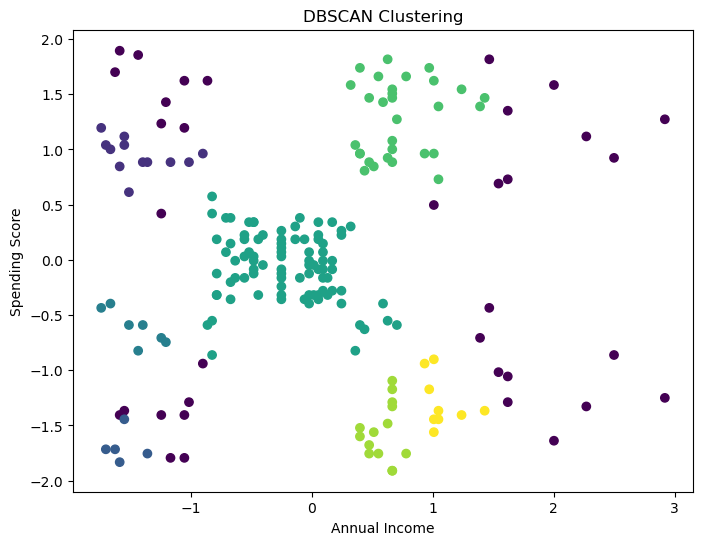

In [21]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()